# DATASET

In [ ]:
from  google.colab import drive


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## REMOVING UNFORMATED IMAGES

In [ ]:
from pathlib import Path
import imghdr
import os

data_dir = "/content/drive/MyDrive/Normal ILL dataset"
image_extensions = [".jpg",".png","jpeg"]

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            # Delete the file
            os.remove(filepath)
            print(f"{filepath} has been deleted")


/content/drive/MyDrive/Normal ILL dataset/train/normal/sahiwal cow (16).jpg is a webp, not accepted by TensorFlow
/content/drive/MyDrive/Normal ILL dataset/train/normal/sahiwal cow (16).jpg has been deleted


## IMPORTING LIBRARIES

In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

# MODEL ARCHITECTURE

In [2]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 1s 0us/step


In [3]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [5]:
conv_base.trainable = False

# DATA ARGUMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Normal ILL dataset/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Normal ILL dataset/val',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 1322 images belonging to 2 classes.
Found 204 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
42/42 [==============================] - 24s 547ms/step - loss: 0.7223 - accuracy: 0.6967 - val_loss: 0.3927 - val_accuracy: 0.8480
Epoch 2/10
42/42 [==============================] - 22s 525ms/step - loss: 0.3758 - accuracy: 0.8306 - val_loss: 0.3831 - val_accuracy: 0.8284
Epoch 3/10
42/42 [==============================] - 21s 497ms/step - loss: 0.3201 - accuracy: 0.8616 - val_loss: 0.3978 - val_accuracy: 0.8480
Epoch 4/10
42/42 [==============================] - 22s 524ms/step - loss: 0.2759 - accuracy: 0.8850 - val_loss: 0.3792 - val_accuracy: 0.8676
Epoch 5/10
42/42 [==============================] - 22s 530ms/step - loss: 0.2582 - accuracy: 0.8979 - val_loss: 0.4800 - val_accuracy: 0.8039
Epoch 6/10
42/42 [==============================] - 21s 500ms/step - loss: 0.2150 - accuracy: 0.9115 - val_loss: 0.3931 - val_accuracy: 0.8676
Epoch 7/10
42/42 [==============================] - 22s 530ms/step - loss: 0.1965 - accuracy: 0.9274 - val_loss: 0.3935 - val_accuracy: 0.8676

# EVALUATION

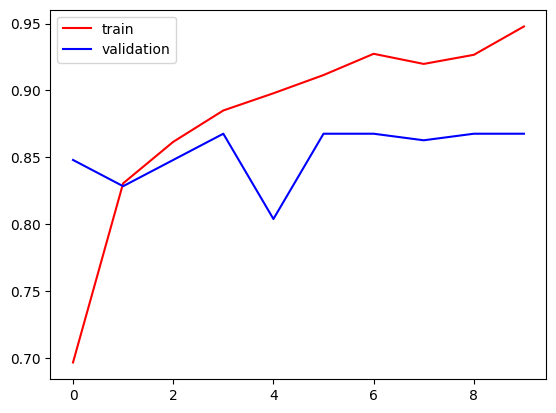

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

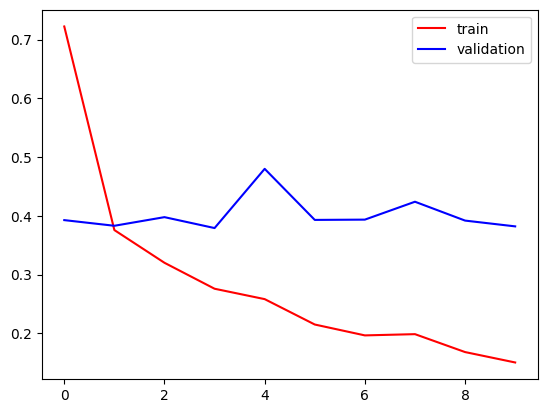

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()